# **Quantium Virtual Intership - Data Analytics**

---



## Project Background

Category Manager for Chips(A Chips Making Company) wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from this analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

---



### Task Breakdown
1. Examine & Explore the data
2. Clean up the data 
3. Analyse customer segments – Define the metrics. Look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights.
4.Deep dive into customer segments – define recommendation from the insights, determine which segments client should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 


In [1]:
### Importing Necesary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import os

%matplotlib inline

#### The transaction data is a bit large so to simplify loading it into the notebook, it's more effiecient to programatically load it from github, using the request library.

In [2]:
url_data = 'https://github.com/idowujames/Quantium-Virtual-Intership/blob/main/QVI_transaction_data.xlsx?raw=true'

r_data = requests.get(url_data)

with open ('QVI_transaction_data.xlsx', 'wb') as file:
  file.write(r_data.content)

In [3]:
### Loading the dataframe 

df_trans = pd.read_excel('QVI_transaction_data.xlsx')

df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Exploring the QVI transaction data

In [4]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Structure of the dataset

> This dataset consist of **264,836** entries with **8** columns

> There are no missing values in the observations but some of the columns are not in optimised datatypes for analysis.

In [5]:
df_trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Getting the number of stores, customers and products in the data to get a better understanding of the dataset

In [6]:
# Checking for number of unique stores in the data
df_trans['STORE_NBR'].nunique()

272

In [7]:
# Checking for number of unique customers in the data
df_trans['LYLTY_CARD_NBR'].nunique()

72637

In [8]:
# Checking for number of unique products in the data
print(df_trans['PROD_NAME'].nunique())

print('--------------')

# Checking if the unique number of product_NAME matches the number of product_NBR
df_trans['PROD_NAME'].nunique() == df_trans['PROD_NBR'].nunique()

114
--------------


True

In [9]:
df_trans['TXN_ID'].nunique()

263127

> There are **272 stores**, **114 Products** and **72,637 Customers** in this dataset

In [10]:
df_trans.sample(16)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
127856,43357,154,154180,154212,2,Cobs Popd Sour Crm &Chives Chips 110g,1,3.8
64745,43394,172,172154,173677,44,Thins Chips Light& Tangy 175g,2,6.6
176996,43450,100,100088,98901,17,Kettle Sensations BBQ&Maple 150g,2,9.2
189508,43565,63,63240,60985,7,Smiths Crinkle Original 330g,2,11.4
158423,43558,96,96207,96033,15,Twisties Cheese 270g,2,9.2
236820,43291,246,246325,248467,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
90834,43319,144,144195,144950,86,Cheetos Puffs 165g,2,5.6
134732,43512,266,266340,264169,38,Infuzions Mango Chutny Papadums 70g,1,2.4
5438,43329,257,257070,256158,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7
183996,43618,247,247225,250016,72,WW Crinkle Cut Original 175g,2,3.4


### Checking for error entries or outliers in the dataset

In [11]:
# Checking if there are errors in the products thats were captures
# We are only interested in chips and not any other products

df_trans['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

### *It appears not all the products in the dataset are chips. Some appear to be salsa sour*

In [12]:
# Checking out entries in the dataset that are salsa

salsa = df_trans[df_trans['PROD_NAME'].str.lower().str.contains('salsa')]

salsa

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,43600,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,43605,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,43330,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,43600,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,43575,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,43554,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,43401,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,43476,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


### Filter out all entries that are salsa from the dataset

In [13]:
df_trans = df_trans[~df_trans.isin(salsa).all(1)]

### looking for ourliers in the product quantity column

In [14]:
df_trans['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

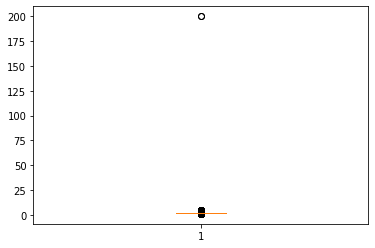

In [15]:
plt.boxplot(df_trans['PROD_QTY'], vert=True);

### *It appears that those who bought 200 chips at a go are outliers because everyone else bout between 1 to 4 chips at a time*

we can filter out these people who bought 200 chips before commencing with our analysis

In [16]:
df_trans[df_trans['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


*It seems only a specific customer has bought over 5 chips at a time. These purchase were of the same quantity(200), brand and from the same store. It's possible this customer is reseller or just had particular party guest, hence the purchase, which is not reflective of the general clientele*

We can drop these entries from the dataset.



In [17]:
# droping entries with the ids which have qty of 200

df_trans = df_trans.drop([69762,69763],axis=0)

## Creating a column for product name and pack size

This columna would help in analysing customer behaviour

In [18]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
# Seperating the brand name into its own column

df_trans['PROD_BR'] = df_trans['PROD_NAME'].str.split(' ', expand=True)[0]

In [20]:
df_trans.sample(8)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BR
188142,43508,43,43219,40139,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle
61933,43511,116,116073,119567,69,Smiths Chip Thinly S/Cream&Onion 175g,2,6.0,Smiths
73667,43373,100,100053,98663,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,Smiths
60082,43370,91,91097,89583,113,Twisties Chicken270g,2,9.2,Twisties
167266,43292,216,216016,214748,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain
53333,43625,241,241043,244796,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,Smiths
127186,43351,145,145220,145463,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,Tyrrells
10642,43463,122,122128,125381,6,RRD Lime & Pepper 165g,2,6.0,RRD


In [21]:
#Confirming that only brand names are captured in the column

df_trans['PROD_BR'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [22]:
# Seperating the packet size into its own column

df_trans['PACK_SIZE'] = df_trans['PROD_NAME'].str.split(' ').str[-1]

df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BR,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,SeaSalt175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150g


*It appears some of the pack size values has some extra info attached to it*

We can confirm this by looking at the unique packet sizes

In [23]:
df_trans['PACK_SIZE'].unique()

array(['SeaSalt175g', '175g', '170g', '150g', '330g', '210g', '210G',
       '270g', '220g', '125g', '110g', '134g', '150G', 'Chli&S/Cream175G',
       'Chckn175g', '380g', 'Chicken270g', '180g', '165g', 'Salt', '250g',
       'Chs&Onion170g', '200g', '160g', 'CutSalt/Vinegr175g', '190g',
       '90g', '70g'], dtype=object)

Some of the entries appears to have packet size as **salt**. We can investigate further to see where the error is coming from

In [ ]:
df_trans[df_trans['PACK_SIZE'] == 'Salt']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BR,PACK_SIZE
65,43605,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
153,43602,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Salt
174,43332,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
177,43602,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Salt
348,43399,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
...,...,...,...,...,...,...,...,...,...,...
264564,43381,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
264574,43628,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
264725,43301,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Salt
264767,43624,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt


So the **Kettle PROD_NAME** has it's pack size at the second position when we were splitting it, rather than at the end like the other entries.

We can change this by checking if the value in the "PACK_SIZE" column of the dataframe is "Salt", and if it is, it replaces the value with the second word of the corresponding "PROD_NAME" column. If the "PACK_SIZE" is not "Salt", it remains unchanged. 

In [24]:

df_trans['PACK_SIZE'] = np.where(df_trans['PACK_SIZE'] == 'Salt', df_trans['PROD_NAME'].str.split(' ').str[1], df_trans['PACK_SIZE'])

In [25]:
# confirming that the above worked and salt has been replaced with an actual packet size
df_trans['PACK_SIZE'].unique()

array(['SeaSalt175g', '175g', '170g', '150g', '330g', '210g', '210G',
       '270g', '220g', '125g', '110g', '134g', '150G', 'Chli&S/Cream175G',
       'Chckn175g', '380g', 'Chicken270g', '180g', '165g', '135g', '250g',
       'Chs&Onion170g', '200g', '160g', 'CutSalt/Vinegr175g', '190g',
       '90g', '70g'], dtype=object)

Since that has been solved, we can now work on entries which have extra information other than the actual pack size e.g 'SeaSalt175g' by extracting only the pack size 175g from the entry.

In [26]:
# Extracting only pack sizes without any extra info from the entries

df_trans['PACK_SIZE'] = df_trans['PACK_SIZE'].str.extract('(\d+.*)')

df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BR,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150g


Confirming only pack sizes with no extra info is present in the column

In [27]:
df_trans['PACK_SIZE'].unique()

array(['175g', '170g', '150g', '330g', '210g', '210G', '270g', '220g',
       '125g', '110g', '134g', '150G', '175G', '380g', '180g', '165g',
       '135g', '250g', '200g', '160g', '190g', '90g', '70g'], dtype=object)